<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Experiments and Hypothesis Testing

_Authors: Alexander Egorenkov (DC)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Explain the purpose and steps in hypothesis testing
- Determine causality and sampling bias using Directed Acyclic Graphs
- Define the null and alternative hypotheses.
- Perform a two-sample t-test.
- Define the t-statistics and p-value.
- Identify what missing data is and how to handle it
- Test a hypothesis using a sample case study

### Lesson Guide
- [Data Source](#data-source)
	- [What Are the Features/Covariates/Predictors?](#what-are-the-featurescovariatespredictors)
	- [What Is the Outcome/Response?](#what-is-the-outcomeresponse)
	- [What Do You Think Each Row in the Data Set Represents?](#what-do-you-think-each-row-in-the-dataset-represents)
- [Math Review](#math-review)
	- [Covariance](#covariance)
	- [Correlation](#correlation)
	- [The Variance-Covariance Matrix](#the-variance-covariance-matrix)
- [Causation and Correlation](#causation-and-correlation)
	- [Structure of Causal Claims](#structure-of-causal-claims)
	- [Why Do We Care?](#why-do-we-care)
	- [How Do We Determine if Something is Causal?](#how-do-we-determine-if-something-is-causal)
- [The Pearlean Causal DAG Model](#pearlean-causal-dag-model)
	- [What Is a DAG?](#what-is-a-dag)
	- [X Causes Y](#its-possible-that-x-causes-y)
	- [Y Causes X](#y-causes-x)
	- [The Correlation Between X and Y Is Not Statistically Significant](#the-correlation-between-x-and-y-is-not-statistically-significant)
	- [X or Y May Cause One or the Other Indirectly Through Another Variable](#x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable)
	- [There is a Third Common Factor That Causes Both X and Y](#there-is-a-third-common-factor-that-causes-both-x-and-y)
	- [X and Y Cause a Third Factor, But Our Data Collect the Third Factor Unevenly](#both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly)
	- [Controlled Experiments](#controlled-experiments)
	- [When Is it OK to Rely on Association?](#when-is-it-ok-to-rely-on-association)
	- [How Does Association Relate to Causation?](#how-does-association-relate-to-causation)
- [Sampling Bias](#sampling-bias)
	- [Forms of Sampling Bias](#forms-of-sampling-bias)
	- [Problems From Sampling Bias](#problems-from-sampling-bias)
	- [Recovering From Sampling Bias](#recovering-from-sampling-bias)
    - [Stratified Random Sampling](#stratified-random-sampling)
- [Missing Data](#missing-data)
	- [Types of Missing Data](#types-of-missing-data)
	- [De Minimis](#de-minimis)
	- [Class Imbalance](#class-imbalance)
    - [Over and Under Sampling](#over-under-sample)
    - [Relation to Machine Learning](#relation-to-machine-learning)
- [Introduction to Hypothesis Testing](#introduction-to-hypothesis-testing)
	- [Validate Your Findings](#validate-your-findings)
	- [Confidence Intervals](#confidence-intervals)
	- [Error Types](#error-types)


## Scientific Method

In general our Data Science workflow follows an approach mirroring the scientific method

**1. Question**<br>
**2. Hypothesis**<br>
**3. Experiment**<br>
**4. Observation**<br>
**5. Analysis**<br>
**6. Conclusion**<br>
<br>

To allow ourselves to come back to a data driven decision - we need to approach our area of study by setting up a reliable, reproducible/repeatable framework. Key to that is building out a data science "laboratory" governed by a few rules. The first is building an effective hypothesis

### Rules of Experiments
1. Must show that a hypothesis is **Supported** or **Not Supported**
2. Results must be **Measurable** and **Objective**
3. Must be **Repeatable**.

<a id="data-source"></a>
## Data Source

---

Today, we’ll use advertising data from an example in the book [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).
- This is a well-known, standard introduction to machine learning.
- The book has a more advanced version — [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) — if you are comfortable with linear algebra and statistics at the graduate level.

#### Code-Along: Bring in Today's Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [2]:
# Read data into a DataFrame.#this is superfised learning which mean he gives us features and tell us what the answer is. Newspaper is the feature, sale is the target 

# We use index_col to tell Pandas that the first column in the data has row labels.
advertising = pd.read_csv('../data/advertising.csv')
advertising.head() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Examine the data with .info(). 

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, how should we spend our advertising money in the future?"

<a id="what-are-the-featurescovariatespredictors"></a>
### What are the Features/Covariates/Predictors?

###### Answer:

TV , Radio, Newspaper

<a id="what-is-the-outcomeresponse"></a>
### What Is the Outcome/Response?

###### Answer:
Sales

<a id="what-do-you-think-each-row-in-the-dataset-represents"></a>
### What Do You Think Each Row in the Data Set Represents?

###### Answer:

repeated observation - market, customer, product lines

<a id="math-review"></a>
## Math Review
---

<a id="covariance"></a>
### Covariance

Covariance is a measure of the joint variability between two random variables.

You can think of this as a measure of linear association. If you have a variance of Y and a variance of X, the covariance is the amount of variance they share.

$$cov(X, Y) = \frac {\sum{(x_i - \bar{X})(y_i - \bar{Y})}} {n}$$

#### The math can be a bit intimidating, but I show it only to ask these two questions:

* When will covariance be positive?
* How will outliers affect covariance?

> We can gain insight into covariance by looking closely at the formula above. First, observe that the formula effectively pairs the first $x$ data point with the first $y$ data point: $(x_1, y_1)$. All computations are done solely on these pairs of points.

> Second, let's ask ourselves, **when would covariance be positive**? From the numerator, covariance would be positive if, for all pairs of data points, $(x_i - \bar{X})$ and $(y_i - \bar{Y})$ are 1) both positive or 2) both negative. This occurs when: 1) Both data points are greather than their respective means. Or when: 2) Both data points are less than their respective means! So, if the $x$ data points vary from their mean in the same way the $y$ data points vary from their mean, covariance will be positive.

> Third, let's consider: **Might outliers affect covariance?** Yes! Given the structure of the formula (a sum of terms), a large outlier pair far from the means could strongly pull the covariance in one direction.


**A Useful Special Case (Used Below)**

$$cov(X, X) = \frac {\sum{(x_i - \bar{X})^2}} {n} = var(X) = \sigma_X^2$$


### Principles of Covariance
1. **Bilinearity.** Covariance is directly proportional to the scale of X and Y.

2. **Correlation.** Covariance increases as the points approximate an upward sloping line and decreases as the points approximate a downward sloping line.

3. **Linear Associations.** Because non-linear associations can create mixtures of positives and negatives, they lead to unpredictable (and not very useful) covariances.

4. **Outlier Sensitivity.** Given the structure of the formula (a sum of terms), a large outlier pair far from the means could strongly pull the covariance in one direction.

<a id="correlation"></a>
### Correlation

While covariance is a useful measure, it can be difficult to compare covariances, as they are not standardized. 

Instead we can use the correlation, which measures the same effect but reports it as a range from -1 to 1. 1 represents perfect covariance and correlation, 0 represents no correlation, and -1 one represents perfect inverse correlation.

$$corr(X,Y) = \frac {cov(X,Y)} {\sigma_X\sigma_Y} = \frac {\mathbb{E}[(\mathbf{X}-\mathbb{E}[\mathbf{X}])(\mathbf{Y}-\mathbb{E}[\mathbf{Y}])]} {\sigma_X\sigma_Y}$$

Note that the variance is always positive, making the denominator positive. So, the sign of the covariance between $X$ and $Y$ is the same as the sign of their correlation! 

The following visual examples better illustrate how correlation refers to how $X$ and $Y$ change together. Notice that a correlation number by itself is not always indicative of the relationship between the variables — always try to supplement 2-D correlation with a visual!

![](./assets/images/correlation_examples.png)


Another familiar way to look at correlation, with R-squared (Note: The square root of R-squared is the correlation coefficient):

<img src="./assets/images/Correlation.jpg">

<a id="the-variance-covariance-matrix"></a>
### The Variance-Covariance Matrix

For our purposes in modeling and machine learning, the fastest way to get a preview of the underlying relationships in our data is to use the variance-covariance matrix.

The variance-covariance matrix shows the covariance between every variable in our data set.

If you have many $x$-variables, it's common to organize covariances into a **var-covar matrix** (sometimes just called a **covariance matrix**).

Given $n$ features from $X_1$ to $X_n$, the variance-covariance matrix looks like this (recall that $cov(X, X) = var(X)$):

$$
\mathbf{\Sigma} = 
\left[ \begin{array}{c}
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_n)  \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_n)  \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_n,X_1) & \text{Cov}(X_n,X_2) & \cdots & \text{Var}(X_n)
\end{array} \right]
$$


From a quick glance at this matrix, we can glean insight about which variables might be strongly correlated. This may also indicate redundant features and/or affect some models.

If data are centered around the mean, every column has its mean subtracted from itself. So, the mean for every column is now 0. You can then compute the variance-covariance matrix as:

$$\frac {X^TX} {n}$$

Those of you who have been exposed to linear regression may recognize this term.

But... still not useful right? We can't read covariances easily. So it's also common to have a **correlation matrix**:

$$
\mathbf{R} = 
\begin{bmatrix}
1 & \text{Corr}(X_1, X_2) & \cdots & \text{Corr}(X_1, X_n) \\
\text{Corr}(X_2, X_1) & 1 & \cdots & \text{Corr}(X_2, X_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Corr}(X_n, X_1) & \text{Corr}(X_n, X_2) & \cdots & 1 \\
\end{bmatrix}
$$

#### Calculate the variance-covariance matrix. Make sure to first de-mean the data:

##### Or.... use the DataFrame's built-in .cov() method

In [7]:
# Answer:
# demean, i.e. subtract the mean from each observation
X = advertising - advertising.mean()

#compute the covariance matrix
np.dot(X.T, X) / ((X.shape[0])-1)

array([[7370.94989322,   69.86249246,  105.91945226,  350.39019472],
       [  69.86249246,  220.42774271,  114.49697889,   44.63568844],
       [ 105.91945226,  114.49697889,  474.30832563,   25.94139196],
       [ 350.39019472,   44.63568844,   25.94139196,   27.22185302]])

In [8]:
# Answer using built-in cov() method

advertising.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


#### Calculate the correlation matrix using the DataFrame's built-in `.corr()` method:

In [9]:
# Answer:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


When we have a large amount of data, the correlation matrix may be too difficult to read. It can help to make a plot.

#### Use Seaborn's `.heatmap()` function to make a plot of the correlation matrix.

- Remember that we imported Seaborn as `sns`.
- To make a correlation matrix from a DataFrame, try `my_df.corr()`.

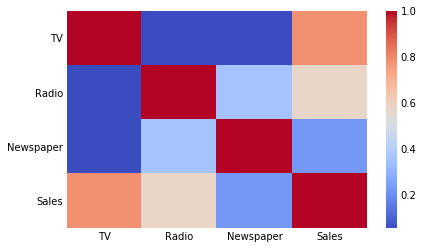

In [10]:
# Answer:
sns.heatmap(advertising.corr(), cmap='coolwarm' );

Or, use the Seaborn `.clustermap` method

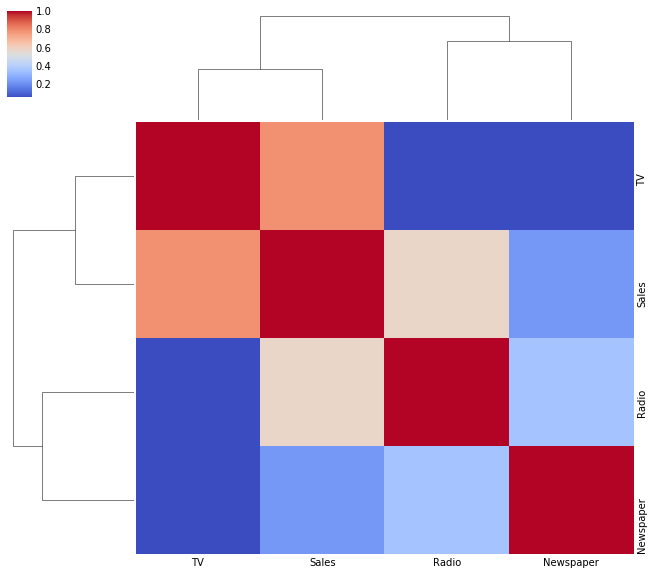

In [11]:
sns.clustermap(advertising.corr(), cmap='coolwarm')

Of course, looking at linear association doesn't show us the whole picture. We can get a more detailed look with a scatterplot matrix.

#### Use Seaborn's `.pairplot()` function to make joint scatterplots of the data.

- See if you can guess or [figure out](http://seaborn.pydata.org/generated/seaborn.pairplot.html) how `pairplot()` might work.
- `pairplot()` plots each column against each column of a DataFrame. So, at the minimum you must have to pass in the DataFrame you want to analyze!

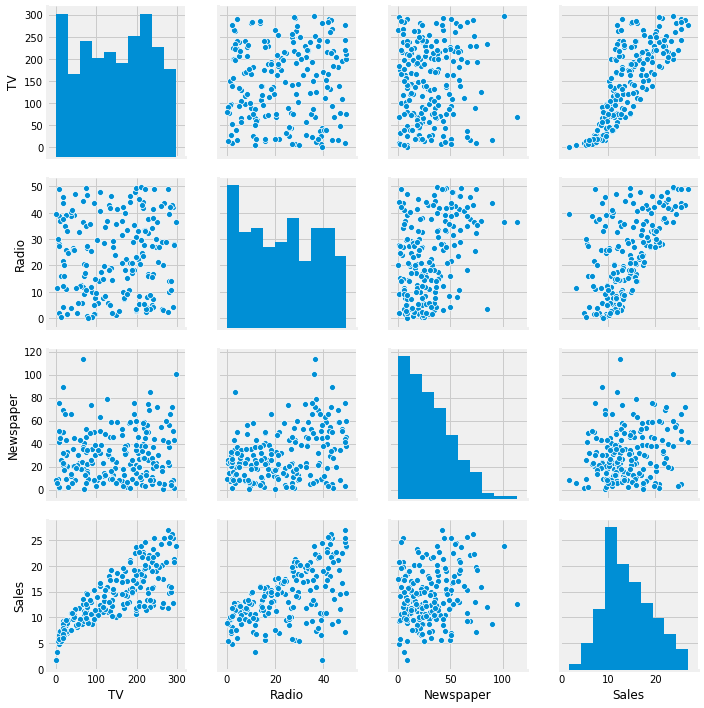

In [12]:
# Answer:
sns.pairplot(advertising)

<a id="causation-and-correlation"></a>
## Causation and Correlation
---

**Objective**: Explain the difference between causation and correlation.

- Think of various examples of studies you’ve seen in the media related to food:
    - "Study links coffee consumption to decreased risk of colorectal cancer"
    - "Coffee does not decrease risk of colorectal cancer"
    - "Diapers, Beer and Data Science in Retail"
    
There's a whole book series based on these [Spurious Correlations](http://www.tylervigen.com/spurious-correlations).

**So, why are these spurious correlations so common?**

- Sensational Headlines
- Professor's need to publish, publish, publish!
- There's a neglect of robust data analysis.
- Causal claims and associations are difficult to convey in an unambiguous way.

The coffee claims above are **correlated** but may or may not be **causal**.

<a id="structure-of-causal-claims"></a>
### Structure of Causal Claims

- If X happens, Y must happen.
- If Y happens, X must have happened.
  - (You need X and something else for Y to happen.)
- If X happens, Y will probably happen.
- If Y happens, X probably happened.

> **Note:** Properties from definitions are not causal. If some a shape is a triangle, it's implied that it has three sides. However, it being a triangle does not _cause_ it to have three sides.

<a id="why-do-we-care"></a>
### Why Do We Care?

- Understanding this difference is critical for executing the data science workflow, especially when identifying and acquiring data.
- We need to fully articulate our question and use the right data to answer it while also considering any **confounders**.

> **Confounders** are unobserved variables that could affect the outcome. If we neglect to include confounding variables in an analysis, we could easily produce an inaccurate model. For example, we might falsely assume that eating more ice cream cones causes us to wear fewer layers of clothing. In actuality, eating ice cream is correlated with a confounding variable — temperature! To perform an accurate analysis, we can only conclude that ice cream consumption is _correlated with_ clothing layers.

- We don’t want to overstate what our model measures.
- Be careful not to say “caused” when you really mean “measured” or “associated.”

<a id="how-do-we-determine-if-something-is-causal"></a>
### How Do We Determine if Something is Causal?

Considering causal criteria is one approach to assessing causal relationships.

However, it’s hard to define universal causal criteria.

One attempt that's commonly used in the medical field is based on work by Bradford Hill.


He developed a list of “tests” that an analysis must pass in order to indicate a causal relationship:


- Strength of association
- Consistency
- Specificity
- Temporality
- Biological gradient
- Plausibility
- Coherence
- Experiment
- Analogy


**Strength (effect size)**: A small association does not mean that there is not a causal effect, although the larger the association, the more likely the effect is to be causal.

**Consistency (reproducibility)**: Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

**Specificity**: Causation is likely if there is a very specific population at a specific site and a disease with no other likely explanation. The more specific an association between a factor and an effect, the greater the probability of a causal relationship.

**Temporality**: The effect has to occur after the cause (and, if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

**Biological gradient**: Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

**Plausibility**: A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

**Coherence**: Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations."

**Experiment**: "Occasionally it is possible to appeal to experimental evidence."

**Analogy**: The effect of similar factors may be considered.

<a id="pearlean-causal-dag-model"></a>
## The Pearlean Causal Directed Acyclic Graph (DAG) Model

---
### Some Quick Background Notes:

- This model is a visual tool to help us reason about causality and association.
- It was proposed by Judea Pearl, although there are many similar models.
- We will only scratch the surface, so look into other resources if you're interested in learning more.
    - We'll cover the basic idea and most notable cases.
    - We won't talk about the formal mathematics or underlying probability, or how to use d-seperation to infer causality.

<a id="what-is-a-dag"></a>
### What Is a DAG?
- DAG stands for directed acyclic graph; it's a collection of nodes connected by lines. 
- Each line has an arrow to point in a direction.
- If you follow the arrows, you reach a final node. There are no loops.

A single circle or node in a causal DAG represents an event; something that happens at one point in time.

![](./assets/images/dag1.png)

Let's pretend random variables X and Y — or two different types of events — are correlated with each other.

**What are the possible causal structures that would produce this correlation?**

- X causes Y.
- Y causes X.
- There is no actual causation.
- X or Y indirectly causes the other.
- There is a third factor that causes both.
- X and Y cause a third factor, but our data collect the third factor unevenly.

<a id="its-possible-that-x-causes-y"></a>
### X causes Y.
![](../assets/images/x-cause-y.png)

<a id="y-causes-x"></a>
### Y causes X.
![](../assets/images/y-cause-x.png)

<a id="the-correlation-between-x-and-y-is-not-statistically-significant"></a>
### The correlation between X and Y is not statistically significant.
![](../assets/images/xy.png)

<a id="x-or-y-may-cause-one-or-the-other-indirectly-through-another-variable"></a>
### X or Y may cause one or the other indirectly through another variable.
![](../assets/images/x-c-z-y.png)

<a id="there-is-a-third-common-factor-that-causes-both-x-and-y"></a>
### There is a third common factor that causes both X and Y.
![](../assets/images/z-cause-xy.png)

<a id="both-x-and-y-cause-a-third-variable-and-the-dataset-does-not-represent-that-third-variable-evenly"></a>
### X and Y cause a third factor, but our data collect the third factor unevenly.

![](../assets/images/xy-causez.png)

Generally, recovering the causality structure from a correlation matrix is difficult or at times impossible. However, thinking through causal effects can give you a much better intuition regarding your variables and your data.

### What Is a "Confounder"?

Let’s say we performed an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer?

As we've noted before, if lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.
![](../assets/images/smoke-lighter-cancer.png)

If we believe the structure above, conditioning on smoking by only looking at non-smokers removes the correlation between lighters and cancer.

<a id="controlled-experiments"></a>
### Controlled Experiments

- The most foolproof way to measure an effect is to control all of the confounders and directly intervene and control our variable of interest. 
- This way we know that any correlation we find is not because of the confounders but instead because of the variable we control. 
- This also means that all the effects we see are due to the variable we control.
- However, experiments are not always possible and take longer than using observational data.

<a id="when-is-it-ok-to-rely-on-association"></a>
### When Is it OK to Rely on Association?

- **When any intervention that arises from your model affects only the outcome variable.**
    - In other words, you only need to predict Y.
    - This works because we only need to observe explanatory variables and implicitly know the confounders' effect.
    - Decision-making and intervention based on your model are hidden dangers that can shift confounders.
    - You can always retrain your model to work with a new set of confounders if they shift.

- **When correlation is causal.**
    - If you are sure there are no confounding factors or selection bias, then that association might be a causation (risky).
    - It's OK to exclude confounders that have very unlikely or small effects.
    - This is a saving grace. To create a good model, you only need variables that correlate with your outcome.
        - Those variables merely need to meaningfully correlate with your outcome.

<a id="how-does-association-relate-to-causation"></a>
### How Does Association Relate to Causation?

- Most commonly, we find an association between two variables.
    - There is an observed correlation between the variables.
    - There is an observed correlation in a subset of data.
    - We find that the descriptive statistics significantly differ in two subsets of data.

- We may not still fully understand the causal direction (e.g., does smoking cause cancer or does cancer cause smoking?).
    - A causes B, B causes A, or a third factor causes both.
        - A and B never cause each other!

- We also might not understand other factors influencing the association.

Confounding variables often hide the true association between causes and outcomes.

A directed acyclic graph (DAG) can help determine which variables are most important for your model. It helps to visually demonstrate the logic of your models.

### Code-Along: Explore the Associations in the Advertising Data

#### Visualize the relationship between the features and the response using scatterplots.

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. 
- Using this as an example, can you also make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`?
- `axs[0]` is the first coordinate grid, `axs[1]` is the second coordinate grid, etc.

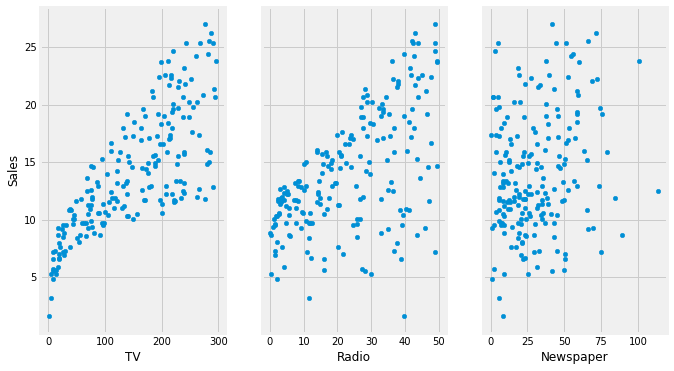

In [13]:
# Visualize the relationship between the features and the response using scatterplots:
fig, axs = plt.subplots(1, 3, sharey=True)

advertising.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 6));
advertising.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], figsize=(10, 6));
advertising.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], figsize=(10, 6));

#### Is there a relationship between ads and sales? Which type of ads?

###### Answer:

Yes - strongest from TV, then radio, then newspaper

#### Can we say this a causal relationship?

###### Answer:

No - we haven't proven causality

#### What other questions might we want to know about this data?

###### Answer:
Write down your own questions here. (Put a couple in Slack)

### Group Exercise: Evaluate Which Type of Ad is Associated With Higher Sales

Let's say we want to evaluate which type of ad is associated with higher sales.

1. Draw a basic DAG on your table or whiteboard.
    - Think about other variables that may predict sales.
    - Think about confounders.
    - Think about the downstream effects changing investment in advertising.
    - Be ready to share an example.

### Section Summary

1) **It's importlant to have deep subject area knowledge.** You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be wrong.

2) **A DAG (directed acyclic graph) can be a handy tool for thinking through the logic of your models.**

3) **There is a distinction between causation and correlation.** In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent — especially in cutting-edge fields where there are many other unknown variables.

4) **Good data are essential.** Throughout this course we will be developing your data intuition so you can spot gaps and bias more readily. You'll also be introduced to tools that can help. However, your analysis is only as good as your understanding of the problem and the data.

<a id="sampling-bias"></a>
## Sampling Bias
---

**Sampling bias** occurs when a sample is collected in such a way that some members of the intended population are more or less likely to be included than others.

This can happen when a sample is taken non-randomly — either implicitly or explicitly.

When we have non-random sampling that results in sampling bias, it can affect the inferences or results of our analyses. We must be sure not to attribute our results to the process we observe when they could actually be because of non-random sampling.

Conceptually, this is straightforward: **When we have sampling bias, we aren't measuring what we think we are measuring.**

<a id="forms-of-sampling-bias"></a>
### Examples of Sampling Bias

- **Pre-screening:** Purposely restricting the sample to a specific group or region.
    - This typically happens when people try to study priority areas to save costs and assume priority areas are the same as random areas.
- **Self-selection:** When someone has the ability to non-randomly decide what is included in a sample.
    - This typically happens in surveys and polls but can also be an issue with other kinds of reporting.
- **Survivorship bias:** When we select only surviving subjects in a sample over time.
    - This might happen when we only look at existing customers and assume they have the same characteristics as new customers.
    
    
### Exercise: Team up and determine a potential real example of each.

<a id="problems-from-sampling-bias"></a>
### Problems That Arise From Sampling Bias
- We could overestimate or underestimate means and sample statistics for simple characteristics.
- It's possible to have artificial correlation where there should be none.

If you wanted to get the average height of the residents of Washington, DC, would you only sample the Washington Wizards?

<a id="recovering-from-sampling-bias"></a>
### Recovering From Sampling Bias
- Working out causal DAGs can help you identify when to watch out for sampling bias.
- Generally, it's best to prevent sampling bias whenever possible.
- We can't really do anything if we ENTIRELY exclude an important group of data.
- However, if portions of our data are overrepresented or underrepresented, there are ways to correct that effect.
    - Typically, we explicitly model the selection process, which means we need data on factors that determine whether  or not someone participates.
    - **Account for it**: If certain portions of the data are over/underrepresented, we can account for this.
        - The field of **survey methodology** is built around gaining insights from data collected in interesting ways.

<a id="stratified-random-sampling"></a>
### Stratified Random Sampling

Sometimes it's better to sample certain subpopulations specifically. You can perform an SRS within **strata** of the population.  This is called **stratified random sampling** and if it's done well, it can yield better insights than an SRS on the whole populations.

- **Stratified random sampling** ensures we capture important population characteristics in the random sample. If we know that the population is half males and half females, for example, we can make sure that our sample is half male and half female. We effectively break the population into two "strata" (groups), then randomly sample from each group to obtain our overall sample. This method is similar to taking a weighted average and depends on knowing key population statistics.
    - For example, if we are collecting survey data, we might ensure our participants are evenly split between men and women.

<a id="missing-data"></a>
## Missing Data
---

Sometimes we are unable to collect every attribute for a particular observation.

Unfortunately, this makes the observation unusable until we decide how to deal with it.

**We have to decide whether to:**
    - Drop the observation.
    - Drop the attribute.
    - Impute a value for that specific attribute and observation.

**So, how do we decide?**

<a id="de-minimis"></a>
### De Minimis
- If few enough observations are missing, it's not likely to change our results to a meaningful degree.
- In these cases, we don't have to bother with trivialities and simply pick a method that works well enough.

<a id="types-of-missing-data"></a>
### Types of Missing Data

- **Missing completely at random (MCAR)**
    - The reason that the data are missing is completely random and introduces no sampling bias.
    - In this case, it's safe to drop or impute.
    - We can test for this by looking at other attributes for missing and non-missing groups to see if they match.

- **Missing at random (MAR)**
    - The data are missing in a way that is related to another factor.
    - This is a form of sampling bias.
    - Like other instances of sampling bias, we can fix this by modeling the selection process.
        - This is done by building a model to impute the missing value based on other variables.

- **Missing not at random (MNAR)**
    - The response is missing in a way that relates to its own value.
    - We can't test for this.
    - We also can't fix this in a reasonable way.

<a id="class-imbalance"></a>
### Class Imbalance

Sometimes a sample may include an overrepresentation of one type of class. For example, airport security may have 990 X-ray scans showing the absence of a weapon. Due to natural scarcity, it may only provide 10 scans showing a weapon.

- If our goal is to create a model that indicates whether or not a weapon is present, then we are at a disadvantage. **Ignoring the class imbalance** would lead to a model that always guesses that a weapon is not present!
    - Note that most optimization procedures optimize for training data accuracy. Always guessing that a weapon is absent leads to 990/1000 correct results; an accuracy of 99 percent.


<a id="over-under-sample"></a>
### Undersampling & Oversampling 

![](./assets/images/resampling.png)
- A simple way to address class imbalance is to **undersample** the majority class, deliberately leaving us with a balanced data set of 10 each. However, this is less than ideal, as it effectively ignores much of the available data.
<br>
<br>
- Alternatively, we could **oversample** the minority class by duplicating examples. Again, this is not ideal. Because we have very little data, this will magnify small differences that may just be errors, leading to a model that overfits.
<br>
<br>
It is highly suggested to learn about the various methods available to you to accomplish both approaches along with their concepts. This [overview on the kaggle website](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets) will walk you through a range of topics to include:
- Imbalanced datasets
- The metric trap
- Resampling
- Random under-sampling
- Random over-sampling
- Python imbalanced-learn module
- Random under-sampling and over-sampling with imbalanced-learn
- Under-sampling: Tomek links
- Under-sampling: Cluster Centroids
- Over-sampling: SMOTE
- Over-sampling followed by under-sampling
- Additional Recommended reading

Later in the course, we will look at additional methods for training models to work around class imbalance. For example, we may use an optimization algorithm that cares less about accuracy and more about minimizing particular types of errors. 


<a id="relation-to-machine-learning"></a>
### Relation to Machine Learning

Many of the topics discussed in this lesson are used in both statistics and machine learning. However, some of the terminology differs. 

Throughout this lesson, we have discussed **variables** (typically **independent variables** and **dependent variables**). For example, we might be given the **linear estimator** $Y = mX + b$. We could say that this contains two variables ($X$ - independent and $Y$ - dependent (i.e., the prediction, as it depends on $X$)), a coefficient of $m$, and the constant of $b$.

In machine learning, we typically rewrite this as a function — $\hat{y}(x) = mx + b$ — and call it a **linear model**. The predicted value is $\hat{y}(x)$ ("prediction" is denoted by the carat), which is dependent on $x$. We might call $x$ a **feature** rather than a variable.

> **Example:** Suppose a house price $P$ is linearly dependent on its square footage $S$. So, we might predict $P = cS + b$, where $c$ and $b$ are constants. Alternatively, we could write $\hat{p}(s) = cs + b$. Here, we took a complicated house and modeled it using a single feature — its square footage. Of course, we are likely missing many confounding variables/features that also affect the price! So, our model likely contains a lot of errors.

<a id="introduction-to-hypothesis-testing"></a>
## Introduction to Hypothesis Testing
---

**Objective**: Test a hypothesis within a sample case study.

You'll remember that we've worked previously on descriptive statistics such as mean and variance. How would we tell if there is a difference between our groups? How would we know if this difference was real or if our finding is simply the result of chance?

After taking a random sample at Acme, men on average spend \\$60. Women on average spend \\$70 . Are these two numbers **significantly different**?
- Do we have enough information to know (No, we don't).
- Are these findingds indicative of a real trend, or are they by chance?

For example, if we are working on sales data, how would we know if there was a difference between the buying patterns of men and women at Acme, Inc.? **Hypothesis testing!**

### Four steps to hypothesis testing
1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
2. Specify a level of significance.
3. Calculate your test statistic.
4. Find your $p$-value and make a conclusion.



### Examples of Hypotheses
- The sales in California are greater than the sales in Texas.
- Customer Segment A will have a larger response than Segment B to a specific marketing strategy.
- Changing the subject line of an email will boost sales by 5%.

<a id="validate-your-findings"></a>
## Validate Your Findings

#### How Do We Tell if the Association We Observed is Statistically Significant?

**Statistical significance** is whether or not a result or relationship is caused by something other than mere random chance. Statistical hypothesis testing is traditionally employed to determine whether or not a result is statistically significant.

We might ask: **How likely is the effect observed to be true, assuming the null hypothesis is true?** If the probability of our observation occurring by chance is less than 5 percent (supposing the null hypothesis), then we reject the null hypothesis. _(Note that the 5 percent value is in many ways arbitrary)._

The probability of our observations occurring by chance, given the null hypothesis, is the **p-value** ($p$).

---

**Example:** Suppose you flip a coin three times and get three heads in a row. These three flips are our observations.

+ We want to know whether or not the coin is fair. So, we select the **null hypothesis:**
<br><br>
$$H_0: \text{The coin is fair.}$$
<br>
+ Now, let's suppose the null hypothesis is true. Three heads in a row occurs with a chance of $1/2^3 \approx 12.5\%$.
+ Because there is a reasonable ($> 5\%$) chance of three heads occuring naturally, we do not reject the null hypothesis.
+ So, **we conclude** that we do not have enough data to tell whether or not the coin is fair ($p = 0.125$).

---

In other words, we say that something is NOT statistically significant if there is a less than 5 percent chance that our finding was caused by chance alone (assuming the null hypothesis is true).

However, suppose that we flipped the coin ten times and received all 10 heads. The probability of this occuring is $1/2^10 = 1/1024$, which is below $5\%$. In this case, we **would reject the null hypothesis and conclude the coin is unfair**.

Hopefully the logic shines through here:
- 3 heads in a row isn't rare. It can happen.
- 10 heads in a row is extremely unlikely. I'd believe the coin was unfair.

### Guided practice: hypothesis testing for coin flips

Let's say we want to test whether a coin is rigged to turn up more heads when flipping. What's our null hypothesis? How would we simulate this?

In [17]:
trials = 100000
np.random.seed(3)
# as we increase the sample size, we approach a normal distribution
data = np.random.randint(2, size = (trials,30)) 
data

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [18]:
N = np.sum(data, axis = 1) # sum up the number of heads in rows (experiments)
N

array([13, 16, 17, ..., 15, 17, 11])

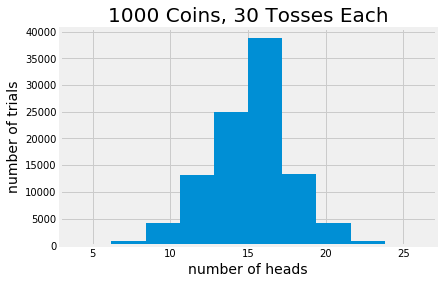

In [19]:
plt.hist(N)
plt.title('1000 Coins, 30 Tosses Each', fontsize = 20)
plt.xlabel('number of heads', fontsize = 14)
plt.ylabel('number of trials', fontsize = 14)
plt.show()

Let's say we flipped our real-life coin 30 times, and saw 20 heads. What is the probability of this given $H_0$, which we model with a fair coin? We can use our simulation and simply count the proportion of times we observed a result at least as large as the one we're interested in.

First, let's pick an $\alpha$ **significance level**: at what point do we say a result is improbable enough that we won't believe it happened in a world where $H_0$ is true?

$$\alpha = ?$$

In [20]:
alpha = .05
pval = sum(N >= 20) / trials

print(pval, alpha, pval > alpha)

# This gives ~5% chance, just above our alpha level

0.04969 0.05 False


## Hypothesis Testing Steps

As we walk through hypothesis testing we'll frame an example to add some additional context. In this case say we are testing the efficacy of a new drug on blood pressure:

- Studies cost a lot - so, we randomly select 50 people to be in the placebo control condition and 50 people to receive the treatment.
    - In the context of experiments, we often talk about the "control" group and the "experimental" or "treatment" group.
    - In our example, the control group is the one given the placebo (sugar pill) and the treatment group is the one given the actual drug.
    
    #### We are interested in the average difference in blood pressure levels between the treatment and control groups.
    - We know our sample is selected from a broader, unknown population pool.
    - We can imagine that, in a hypothetical parallel world, we could have ended up with a different random sample of subjects from the population pool.
        - Thus, we can assume there is some variability in the statistics we get from our sample.
    

### Experiment findings so far

Say that, in our drug experiment, we measure the following results:

- The 50 subjects in the control group have an average systolic blood pressure of 121.38.
- The 50 subjects in the experimental/treatment group have an average systolic blood pressure of 111.56.

The difference between experimental and control samples is -9.82 points. 

**But**, with only 50 subjects in each sample, how confident can we be that this measured difference is real? 
- Do we have enough evidence to say that the population average blood pressure is different between these two groups?


We can perform what is known as a **$t$-test** to evaluate this. (A $t$-test is one of many, many types of [hypothesis tests](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing).)

**We can set up the experimental and control observations below as `numpy` arrays.**

In [21]:
control = np.array([166, 165, 120,  94, 104, 166,  98,  85,  97,  87, 114, 100, 152,
                    87, 152, 102,  82,  80,  84, 109,  98, 154, 135, 164, 137, 128,
                    122, 146,  86, 146,  85, 101, 109, 105, 163, 136, 142, 144, 140,
                    128, 126, 119, 121, 126, 169,  87,  97, 167,  89, 155])

experimental = np.array([ 83, 100, 123,  75, 130,  77,  78,  87, 116, 116, 141,  93, 107,
                         101, 142, 152, 130, 123, 122, 154, 119, 149, 106, 107, 108, 151,
                         97,  95, 104, 141,  80, 110, 136, 134, 142, 135, 111,  83,  86,
                         116,  86, 117,  87, 143, 104, 107,  86,  88, 124,  76])



In [22]:
# print the average of the control and experimental groups

print(f"control mean: {np.mean(control)}")
print(f"experimental mean: {np.mean(experimental)}")

# print the difference of the sample means, too

diff = round(np.mean(experimental) - np.mean(control),2)
print(f"difference of sample means: {diff}")


control mean: 121.38
experimental mean: 111.56
difference of sample means: -9.82


## Step 1. Construct a Null Hypothesis
Generally speaking, we start with a **null hypothesis** and an **alternative hypothesis**, which is the opposite of the null. Then, you check whether the data support rejecting your null hypothesis or fail to reject the null hypothesis.

For example:

- **Null hypothesis**: Typically denoted as $H_0$ states there is no relationship between the variables. This is a statement you want to contradict with your findings
- **Alternative hypothesis**: There is a relationship


For our experiment, we will set up a null hypothesis and an alternative hypothesis:

- $H_0$: The true mean difference in systolic blood pressure between those who receive the treatment and those who do not is 0.

- $H_A$: The true mean difference in systolic blood pressure between those who receive the treatment and those who do not is NOT 0.

Note that **"failing to reject"** the null hypothesis is not the same as **"accepting"** it. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

This distinction is important for helping you avoid overstating your findings. You should only state what your data and analysis can truly represent.

Likewise, our measured difference is **-9.82**.

Written out using probability notation, we want to know:

### $$P(\text{data}\;|\;H_0 \text{ true})$$

**What is the probability that we observed this data, assuming that our null hypothesis is true?**

## Step 2. Specify the level of significance

If we assume that our null hypothesis is true, and the probability of observing the data we observed is "small," then our data does not support our null hypothesis. 

**But how "small" is small enough?**

This is set by our level of significance, which we call $\alpha$.

Typically (and arbitrarily) the value $\alpha=0.05$ is used.
- This means that there is a 5% chance that we will _incorrectly reject the null hypothesis_ (a.k.a. Type 1 error or false positive).
- Put another way, there is a 5% chance that we will claim a significant difference in blood pressure between the two groups when in fact there is no (statistically significant) difference.

## Step 3. Calculate your Test Statistic

Hypothesis testing is a "box" where the inputs are our data and the outputs allow us to make our decision 
- Well, in this "box," we are calculating $P(\text{data}\;|\;H_0 \text{ true})$. 
- This calculation requires picking a probability distribution, then comparing the results of our experiment to this distribution to see how extreme our results are relative to the null hypothesis.

When comparing two means, the **t-statistic** (based on the [Student's $t$-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)) is a classic way to quantify the difference between groups. 
- In essence, our $t$-statistic is be a standardized version of the difference between groups.

#### But, let's take a quick look at the mathematical details of the calculation of the $t$-statistic anyway.

When comparing the difference between groups, we can calculate the two-sample $t$-statistic like so:

$$t = \frac{\bar{x}_E - \bar{x}_C}{\sqrt {s^2 \Big(\frac{1}{n_E} + \frac{1}{n_C}\Big)}}$$

> In our example, $\bar{x}_E$ is the mean of our experimental group's sample measurements and $\bar{x}_C$ is the mean of our control group's sample measurements.
>
> $n_E$ and $n_C$ are the number of observations in each group. 
>
> The $s^2$ denotes our *sample variance*. In this version of the $t$-test, we are assuming equal variances in our experimental and control groups in the overall population. There is another way to calculate the $t$-test where equal variance is not assumed.

The sample variance is calculated like so:

$$ s^2 = \frac{\sum_{i=1}^{n_E} (x_i - \bar{x}_E)^2 + \sum_{j=1}^{n_C} (x_j - \bar{x}_C)^2}{ n_E + n_C -2} $$

> This combines the variance of the two groups' measurements into a single pooled metric.

#### Calculating the test statistic

In [23]:
# conduct your t-test
stats.ttest_ind(experimental, control, equal_var=False)

Ttest_indResult(statistic=-1.8915462966190273, pvalue=0.06161817112302221)

## Step 4: Compare the output of our test to our threshold and interpret our decision

$P(Data | H_0)$

The **p-value** is the probability that, **GIVEN THE NULL HYPOTHESIS IS TRUE**, we would observe the current set of data. 

#### How to think about hypothesis testing

The p-value is $P(Data | H_0)$. If this probability is below some *significance level* cut-off ($\alpha$), then we **reject** the null hypothesis; otherwise, we **fail to reject** it.

There is a rich body of inferential statistics that allows us to calculate this analytically using *parametric methods*, i.e. given certain assumptions. This is the traditional way of doing hypothesis tests.

If we have a model of $H_0$, we can sometimes also calculate this directly with simulations.



### So how do we make the decision?

Remember that $\alpha$ is our level of significance.

- If $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, so you accept that $H_0$ is incorrect and therefore $H_A$ is correct.
    - i.e., a statisically significant difference between the two groups!
    - This is like saying there is enough evidence to say our dog isn't innocent... so we say our dog is guilty.
- If $p\text{-value} \ge \alpha$, then there is insufficient evidence to reject the null hypothesis and you cannot accept that either $H_0$ or $H_A$ is correct.
    - i.e., there is no statistical difference between your two groups.
    - This is like saying there is not enough evidence to say our dog isn't innocent. We can't totally determine that our dog is innocent, but we haven't determined that our dog is guilty, either.

#### So what was our decision?

Since the p-value of 0.06 is greater than our cutoff of 0.05 then there is insufficient evidence to reject the null hypothesis

## TL;DR What are we doing?

**GOAL:** To tell whether or not our new treatment is effective. 
- We define "effective" as whether or not those who get the treatment see lower systolic blood pressure, on average.

To do this, we follow the following steps to carry out a **hypothesis test**:
1. Set up null and alternative hypotheses. In pure math terms that, looks like this:

> $$ H_0: \mu_{\text{treatment}} - \mu_{\text{placebo}} = 0 $$
> $$ H_A: \mu_{\text{treatment}} - \mu_{\text{placebo}} \ne 0 $$

2. Decide on a significance level. 
> $\alpha = 0.05$ is a typical choice.

3. Decide on a hypothesis test (there are thousands of them). 
> In this case, we're testing the difference between two means, which is a great time to use a **two-sample $t$-test**.
>
> - The two-sample (independent) $t$-test tests whether or not two population means differ.

4. After carrying out this hypothesis test, we'll see if our data provide enough evidence to reject the null hypothesis.Typically by comparing the p-value to our significance threshold (alpha)

### There are two broad strategies for testing hypotheses:

The first is **Simulation-based**:
- Describe null and alternative hypotheses
- Set significance level alpha
- Define model
- Run simulation
- Calculate p-value
- Compare p-value to alpha

![](./assets/images/Hypothesistestingfigure.png)
_Image from http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html_

The second **Parametric methods**:
- Describe null and alternative hypotheses
- Set significance level alpha
- Define distribution
- Calculate test statistic
- Calculate p-value
- Compare p-value to alpha

## Other Hypothesis Test Statistics
The goal of this lesson was to teach you, in general, how hypothesis testing works. We showed you what is probably the most common variety of hypothesis test: the $t$-test. However, there are many others available. It's not worth our time to go over so many more of them, as they all have the same implementation and interpretation, just in different situations. Instead, here is a list of many of the "big" ones and when to use them:

| Situation | Common hypothesis test | Example | Notes |
| --- | --- | --- | --- |
| Testing whether or not one mean is equal to a value | One-sample $t$-test | Do cars on a given road, on average, drive about 65mph? | |
| Testing whether or not two means are equal to eachother | Two-sample $t$-test | Is the mean systolic blood pressure of people who receive Medicine A or Medicine B the same? | |
| Testing whether or not paired observations have the same value | Paired $t$-test | Among heterosexual married couples, is the husband, on average, taller than the wife? | This is functionally the same as a one-sample $t$-test of the differences |
| Testing whether or not three or more means are the same | One-way ANOVA test | Are base salaries upon graduation different for graduates of Penn State, Ohio State, and Michigan? | The ANOVA test has many variants |
| Testing whether or not there is a relationship between two categorical variables | $\chi^2$ test | Is there a relationship between home state and political affiliation? | |
| Testing whether or not a given distribution is normally distributed | Kolmogorov-Smirnov Test | Testing whether or not model residuals are normally distributed. Useful for testing linear regression assumptions! | |
| Testing whether or not one proportion is equal to a number | One-sample $z$-test | Testing whether or not a coin is fair (ie, testing $P(Heads) = 0.5$) | |
| Testing whether or not two proportions are euqal | Two-sample $z$-test | Who is going to win an election? | Testing two or more proportions can be done better with a $\chi^2$ test |






<a id="confidence-intervals"></a>
### Confidence Intervals

A closely related concept tp **p-values** is **confidence intervals**. A 95 percent confidence interval can be interpreted like so: under infinite sampling of the population, we would expect that the true value of the parameter we are estimating to fall within that range 95% of the time.

Keep in mind that we only have a **single sample of data** and not the **entire population of the data**. The "true" effect/difference is either within this interval or it is not. We have no firm knowledge, however, that our single estimate of the "true" effect/difference is close or not to the "truth". The confidence interval around our estimate tells us, with a given sample size and level of confidence, the range in which future estimates are likely to fall.

Note that using 95 percent confidence intervals is just a convention. You can create 90 percent confidence intervals (which will be more liberal), 99 percent confidence intervals (which will be more conservative), or whatever intervals you prefer.


<img src="../assets/images/Conf_interval.jpeg">

<a id="error-types"></a>
### Error Types

Statisticians often classify errors not just as errors but as one of two specific types of errors — type I and type II.

+ **Type I errors** are false positives.
    - Machine learning: Our model falsely predicts "positive." (The prediction is incorrect.)
    - Statistics: Incorrect rejection of a true null hypothesis.


+ **Type II errors** are false negatives.
    - Machine learning: Our model falsely predicts "negative." (The prediction is incorrect.)
    - Statistics: Incorrectly retaining a false null hypothesis.


Understanding these errors can be especially beneficial when designing models. For example, we might decide that type I errors are OK but type II errors are not. We can then optimize our model appropriately.

> **Example:** Suppose we make a model for airline security in which we predict whether or not a weapon is present ("positive"). In this case, we would much rather have type I errors (falsely predict a weapon) than type II errors (falsely predict no weapon).

> **Example:** Suppose we make a model for the criminal justice system in which we whether or not a defendant is guilty ("positive"). In this case, we would much rather have type II errors (falsely predict innocent) than type I errors (falsely predict guilty).

<img src="../assets/images/Type1_2_errors.png">


Can you phrase these examples in terms of null hypotheses?

## Key Differences Between Business and Statistics
* **We typically ignore measurement error**- What is a customer? Timing (Database entry vs. actual time)
<br>
<br>
* **Tons of data!** Many variables and models will be significant using traditional statistical methods.
<br>
<br>
* **Time Dependency**- Businesses change over time and seasons (ice cream in winter vs. summer), whereas statistics should be absolutely repeatable. (other factors may not be apparent (confounders)
<br>
<br>
* **Business experiments generally cost a lot more** than scientific experiments, and could have greater impact.
<br>
<br>
* **Data is often incomplete** (censored or truncated)

## Conclusions/Summary

* **Hypothesis Testing**: What is it used for?
    - It's often used for _differentiating things_. Today we used it to tell apart two categories. We'll soon use HTs for another purpose: model selection.
    - Steps:
        1. Construct a null hypothesis that you want to contradict and its complement, the alternative hypothesis.
        2. Specify a level of significance.
        3. Calculate your test statistic.
        4. Find your $p$-value and make a conclusion.
* **Confidence Intervals**: What are they used for?
    - Giving ranges of feasible values. When HTs answer yes/no questions, CIs answer open-ended, quantitative ones.

# Exercise - Practicing significance with AB tests
Let's break into groups to dig into some practice examples [Hypothesis Lab](../practice/AB_testing/AB_testing.ipynb)!